In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt


## Data Path

In [2]:
def plot_roc_cur(y_true, y_score, c='b', label = ''):
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot of a ROC curve for a specific class
    lw = 2
    plt.plot(fpr, tpr, color=c, lw=lw,
             label=f'{label} ROC curve (area = {roc_auc:0.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

In [3]:
data_path = '../data/ECommerce/Multi-Store'
train_label = 'train_label.parquet'
train_feature = 'train_feature.parquet'
val_label = 'val_label.parquet'
val_feature = 'val_feature.parquet'
test_label = 'test_label.parquet'
test_feature = 'test_feature.parquet'

## Prep Train Data

In [21]:
train_label_df = pd.read_parquet(os.path.join(data_path, train_label))
train_feature_df = pd.read_parquet(os.path.join(data_path, train_feature))

In [22]:
cols = [col.replace('count_', '') for col in train_label_df.columns]
train_label_df.columns = cols


In [23]:
class_cols = cols[2:]
index_cols = ['user_id', 'event_month']
feature_cols = train_feature_df.columns[2:]

In [24]:
train_label_df.head()

,user_id,event_month,construction,electronics,appliances,NA,apparel,sport,furniture,computers,kids,auto
0,100037567,2020-01,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
1,100140882,2020-01,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146333366,2020-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151417990,2020-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,154128341,2020-02,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
for each_class in class_cols:
    row = train_label_df[each_class].notnull()
    train_label_df.loc[row, each_class] = 1
train_label_df.fillna(0, inplace=True)
train_feature_df.fillna(0, inplace=True)

In [26]:
train_feature_df.set_index(index_cols, inplace=True)
train_label_df.set_index(index_cols, inplace=True)

In [27]:
train_feature_df = train_feature_df.reindex(train_label_df.index)

In [29]:
train_label_df.head()

,,construction,electronics,appliances,NA,apparel,sport,furniture,computers,kids,auto
user_id,event_month,,,,,,,,,,
100037567,2020-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100140882,2020-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146333366,2020-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151417990,2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
154128341,2020-02,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
train_label_df.mean()

construction    0.156289
electronics     0.097583
appliances      0.076699
NA              0.061307
apparel         0.048757
sport           0.033387
furniture       0.020929
computers       0.019511
kids            0.009910
auto            0.005108
dtype: float64

## Prep Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, fbeta_score

### Construction

In [32]:
params = {
    'class_weight': 'balanced',
    'n_estimators': 500
}
clf = RandomForestClassifier(**params, random_state=0)


In [33]:
clf.fit(train_feature_df[feature_cols], train_label_df['construction'])


RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=0)

In [34]:
y_train_pred = clf.predict_proba(train_feature_df[feature_cols])


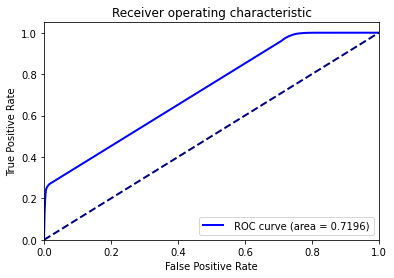

In [35]:
plot_roc_cur(train_label_df['construction'], y_train_pred[:, 1])
